In [3]:
from CoolProp.CoolProp import PropsSI
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


1. Considerando a atmosfera como um gás ideal em equilíbrio, com a mesma temperatura em
todos os pontos, e sendo a altitude $\delta h$ muito menor do que o raio da Terra (6371 × 103 m), de modo que g, o módulo da aceleração gravitacional pode ser considerado constante, temos que a pressão atmosférica pode ser obtida pela equação:

$P(h) = P_A e^{−kg \delta h}$ (1)

Onde $k = \rho /P_A$, sendo ρ e $P_A$ a densidade do ar e a pressão atmosférica ao nível do mar.
Considerando a temperatura a nível do mar como sendo 25 oC, calcule a variação percentual de pressão atmosférica na qual é submetida uma pessoa que sai do centro do município de Resende - RJ (407 m) e chega no topo do Pico das Agulhas Negras (2790,94 m).

DICA: Utilize a função densidade do EES. Verifique também a aba de constantes do programa.


In [33]:
def find_pressure(delta_h):

    P_A = 101.3e3

    rho = PropsSI('D','P',P_A,'T',25+273.15,"air")

    k = rho/P_A

    g = 9.8

    return P_A * np.exp(-k*g*delta_h)

# Constantes

P_A = 101.3e3

h_rio = 407

h_a_negras = 2790.94

delta_h = h_a_negras - h_rio

P2 = find_pressure(delta_h)

print('A variação percentual de pressão é de {:.2f} \%.'.format((P2-P_A)/P_A))

A variação percentual de pressão é de -0.24 \%.



2. O município de Juiz de Fora encontra-se a 678 metros acima do nivel do mar. Determine a
temperatura da mistura líquido-vapor com título de 0,4 à pressão ambiente para os seguintes
fluidos:

a. Amônia;

b. Água;

c. R134a;

d. R22;

e. R410A;


In [28]:
# constates

delta_h = 678

Q = 0.4

names = [
    "Amônia",
    "Água", 
    "R134a",
    "R22",
    "R410A",
]

fluids = [
    "Ammonia",
    "Water", 
    "R134a",
    "R22",
    "R410A",
]

for name, fluid in zip(names, fluids):

    P = find_pressure(delta_h)

    T = PropsSI('T','P',P,'Q',Q,fluid)

    print("A temperatura do fluido '{}' a pressão de {:.2f} Pa é {:.2f} K".format(name,P,T))
    


A temperatura do fluido 'Amônia' a pressão de 93730.59 Pa é 238.29 K
A temperatura do fluido 'Água' a pressão de 93730.59 Pa é 370.96 K
A temperatura do fluido 'R134a' a pressão de 93730.59 Pa é 245.39 K
A temperatura do fluido 'R22' a pressão de 93730.59 Pa é 230.69 K
A temperatura do fluido 'R410A' a pressão de 93730.59 Pa é 220.22 K


3. Plote um gráfico da variação de entalpia do fluido refrigerante R22 do exercício anterior à
pressão ambiente (Juiz de Fora) durante a transição líquido-vapor. Para isso, considere o título
variando entre 0,1 e 0,9.


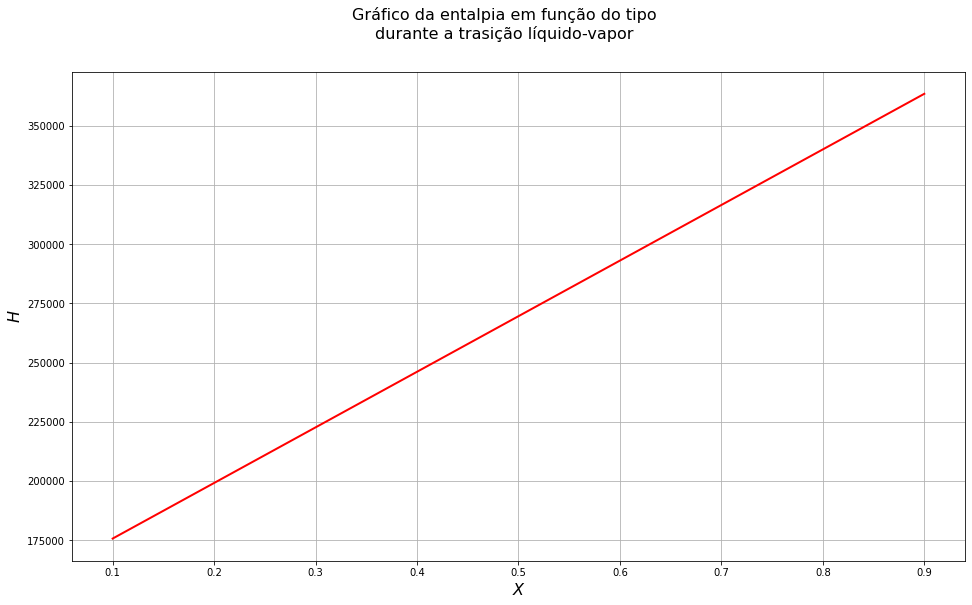

In [29]:
delta_h_jf = 678

P = find_pressure(delta_h_jf)

Q_list = np.linspace(0.1,0.9,num=500)

H_list = []

for Q in Q_list:
    H_list.append(PropsSI('H','P',P,'Q',Q,'R22'))


# plotagem gráfico

fig = plt.figure(figsize=[16, 9])
fig.suptitle('Gráfico da entalpia em função do tipo\ndurante a trasição líquido-vapor', fontsize=16)

# Plotando 2D

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('$X$',fontsize=16)
ax.set_ylabel("$H$",fontsize=16)

ax.plot(Q_list, H_list, 'r', linewidth=2)

ax.grid()

plt.show()


4. Considere os seguintes dados obtidos em um experimento na bancada Thermal Systems AMATROL T7082, através de seus termômetros e manômetros:

| Ponto| Temperatura (oC)| Pressão (bar)|
|---|---|---|
|1 |7,0| 2,5|
|2 |58,0| 13,0|
|3 |38,0| 12,0|
|4 |6,0| 2,0|

Sabendo que o fluido refrigerante aplicado na bancada é o R134a, determine a entalpia e entropia em cada ponto. Considere a pressão atmosférica para Juiz de Fora.

DICA: Utilize a forma de entrada de matriz (Arrays Table) do EES para definir as propriedades a cada ponto. Essa função será essencial para o preencimento dos diagramas P-h.

In [32]:
data = np.array(
    (
        [7,2.5],
        [58,13],
        [38,12],
        [6,2]
    )
)

H_list = []

S_list = []

for sample in data:
    temp = sample[0] + 273.15    
    pres = sample[1]*1e5

    H_list.append(PropsSI('H','P',P + pres,'T',temp,'R134a')/1e3)
    S_list.append(PropsSI('S','P',P + pres,'T',temp,'R134a')/1e3)

    result = np.array((H_list,S_list))

df = pd.DataFrame(np.hstack((data,result.T)),columns=["Temperatura (oC)","Pressão (bar)",'Entalpia (KJ/mol)','Entropia (KJ/K)'])

df


,Temperatura (oC),Pressão (bar),Entalpia (KJ/mol),Entropia (KJ/K)
0,7.0,2.5,403.491985,1.732884
1,58.0,13.0,431.360024,1.727995
2,38.0,12.0,253.384789,1.180017
3,6.0,2.0,403.935965,1.746161
